In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\91964\Desktop\nazia\datascience\Projects_DT\Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 5)

In [5]:
#checking null values

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [ ]:
# EDA Analysis of data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
df=df.drop(columns='Unnamed: 0',axis=1)

In [12]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [13]:
# Relation between feature and target variable

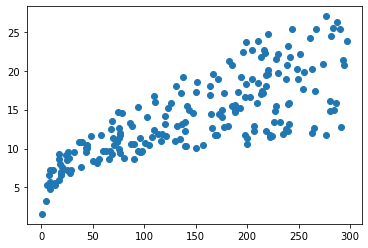

In [14]:
plt.scatter(x='TV',y='sales',data=df)

In [15]:
# when x is increasing means if we spend money in advertising on TV sales increases

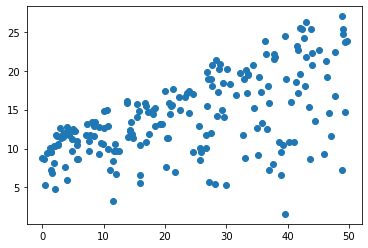

In [16]:
plt.scatter(x='radio',y='sales',data=df)

In [ ]:
# when x is increasing means if we spend money in advertising on radio sales overall increases

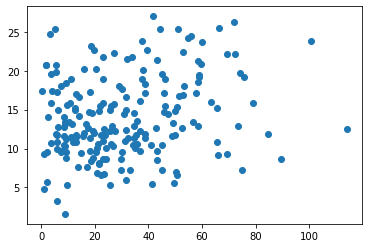

In [17]:
plt.scatter(x='newspaper',y='sales',data=df)

In [18]:
# newspaper is not directly related with sales

In [19]:
# Checking Correlation within Heatmap

In [20]:
corr=df.corr()
corr.shape

(4, 4)

<AxesSubplot:>

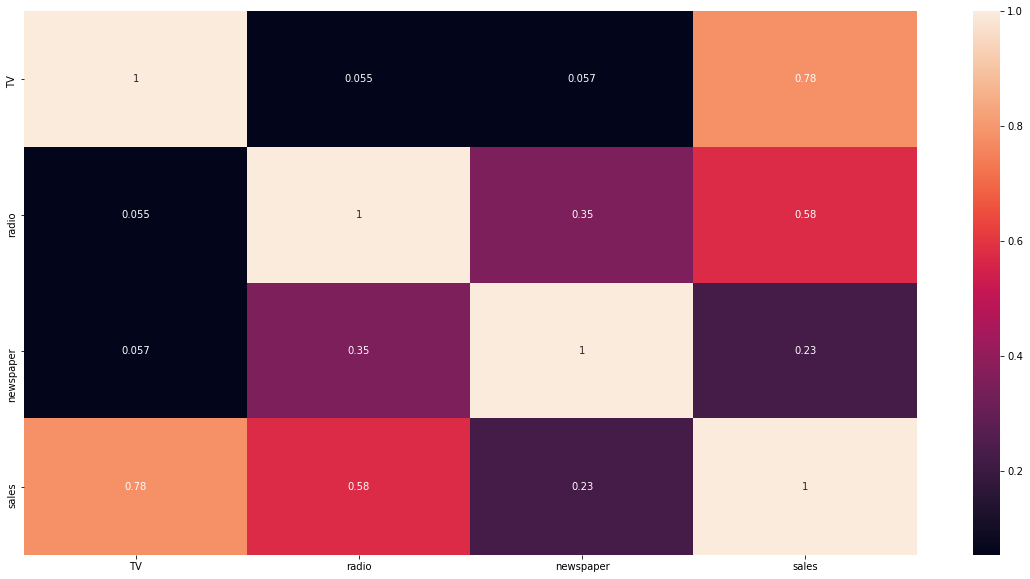

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [22]:
corr['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

In [23]:
# checking skewness

In [24]:
df.skew().sort_values(ascending=False)

newspaper    0.894720
sales        0.407571
radio        0.094175
TV          -0.069853
dtype: float64

In [ ]:
#distribution plot of feature variable

<AxesSubplot:xlabel='TV', ylabel='Density'>

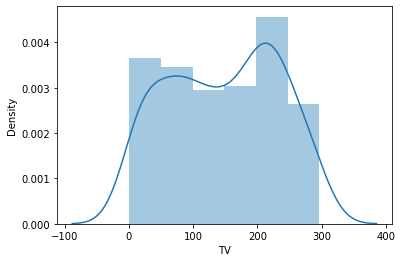

In [25]:
sns.distplot(df['TV'])

In [26]:
# curve is almost bimodal curve

<AxesSubplot:xlabel='radio', ylabel='Density'>

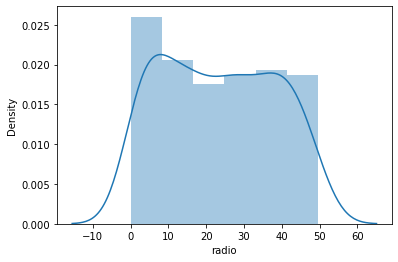

In [27]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

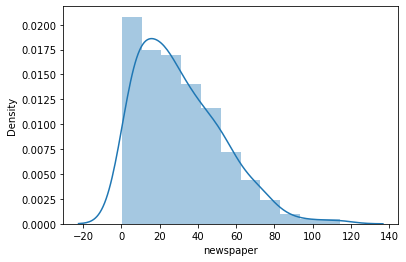

In [28]:
sns.distplot(df['newspaper'])

In [29]:
#skew exist.newspaper has max skewness it is slightly right skewed

In [30]:
x=df.drop(columns=['sales'],axis=1)
y=df['sales']

In [31]:
from sklearn.preprocessing import power_transform
df1=power_transform(x)

In [32]:
type(df1)

numpy.ndarray

In [33]:
df1=pd.DataFrame(df1,columns=x.columns)

In [34]:
df1

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


In [35]:
df1.shape

(200, 3)

In [36]:
df1.skew().sort_values(ascending=False)

newspaper   -0.077942
radio       -0.242968
TV          -0.315199
dtype: float64

In [37]:
x.shape,y.shape

((200, 3), (200,))

In [38]:
#skewness threshold is taken between +/-0.5 

In [39]:
#Checking Outliers

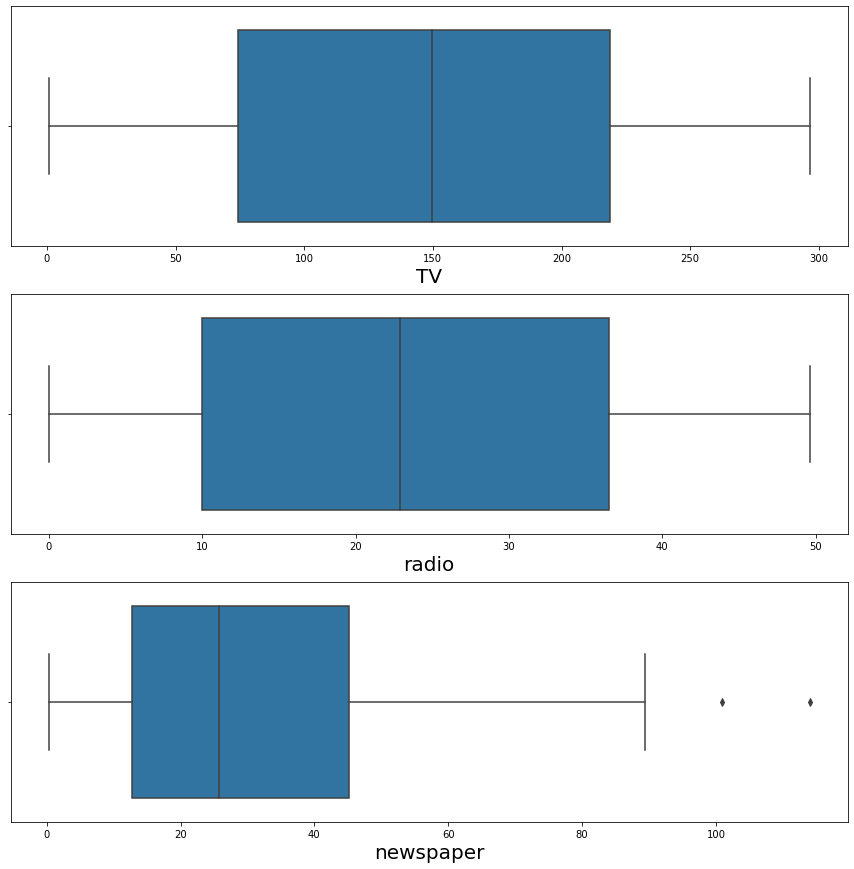

In [40]:
plt.figure(figsize=(15,15))
plotnumber=1

for column in x:
    if plotnumber<=3:
        ax=plt.subplot(3,1,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [41]:
# Checking and Remove Outliers

In [42]:
from scipy.stats import zscore

In [43]:
(np.abs(zscore(x))<3).all()

False

In [44]:
z_score=zscore(df[['newspaper']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [45]:
df.shape

(198, 4)

In [46]:
x=df.drop(columns=['sales'],axis=1)
y=df['sales']

In [47]:
x.shape,y.shape

((198, 3), (198,))

In [48]:
(np.abs(zscore(x))<3).all()

True

In [49]:
data_loss=((200-198)/200)*100

In [50]:
data_loss

1.0

In [ ]:
# now Advertising sales channel prediction model is ready for training

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler=StandardScaler()

In [53]:
x_scaled=scaler.fit_transform(x)

In [54]:
x.shape

(198, 3)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=121)

In [57]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((148, 3), (148,), (50, 3), (50,))

In [58]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [59]:
lr=LinearRegression()
svr=SVR()
dt=DecisionTreeRegressor()
rfc=RandomForestRegressor()

In [60]:
#linear Regression
lr.fit(x_train,y_train)

LinearRegression()

In [61]:
lr.score(x_test,y_test)

0.7808555722261143

In [62]:
y_pred_lr=lr.predict(x_test)

In [63]:
# comparing actual values with predicted values

actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
actual_vs_pred.sample(10)

,Actual,Predicted
24,9.7,8.128863
104,20.7,20.317110
185,22.6,21.069950
113,15.9,16.268666
145,10.3,9.388141
177,11.7,11.955979
168,17.1,17.211844
48,14.8,16.133115
73,11.0,9.715341
26,15.0,15.090470


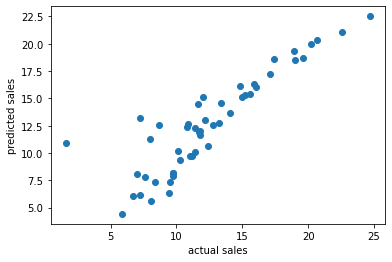

In [64]:
plt.scatter(y_test,y_pred_lr)
plt.xlabel('actual sales')
plt.ylabel('predicted sales')
plt.show()

In [65]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import statsmodels.formula.api as smf

In [66]:
print('Mean absolute error :',(metrics.mean_absolute_error(y_test,y_pred_lr)))
print('Mean squared error :',(metrics.mean_squared_error(y_test,y_pred_lr)))
print('Root mean squared error :',(np.sqrt(mean_squared_error(y_test,y_pred_lr))))
print('R2 value is :',(r2_score(y_test,y_pred_lr)))

Mean absolute error : 1.4202414630627183
Mean squared error : 4.6314474249251205
Root mean squared error : 2.1520797905572926
R2 value is : 0.7808555722261143


In [67]:
lr=smf.ols(formula='y ~x',data=x).fit()

In [68]:
lr.conf_int()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           8.35e-95
Time:                        19:01:38   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000       2.325       3.580
x[0]           0.0457      0.001     32.293      0.000       0.043       0.048
x[1]           0.1886      0.009     21.772      0.000       0.171       0.206
x[2]          -0.0012      0.006     -0.187      0.852      -0.014       0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#SVR
svr.fit(x_train,y_train)

SVR()

In [70]:
svr.score(x_test,y_test)

0.8330612661886949

In [71]:
y_pred_svr=svr.predict(x_test)

In [72]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_svr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_svr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr)))

MAE: 1.0152503291652792
MSE: 3.528120594644496
RMSE: 1.8783292029472618


In [73]:
#using Decisiontree regressor

In [74]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [75]:
dt.score(x_test,y_test)

0.9397470188638106

In [76]:
y_pred_dt=dt.predict(x_test)

In [77]:
y_predict_dt=dt.predict(x_test)

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test,y_predict_dt))
print('MSE:', metrics.mean_squared_error(y_test, y_predict_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict_dt)))

MAE: 0.866
MSE: 1.2734
RMSE: 1.1284502647436438


In [79]:
#using KNN

In [80]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.905520827261034

In [81]:
y_predict_knn=knn.predict(x_test)

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test,y_predict_knn))
print('MSE:', metrics.mean_squared_error(y_test, y_predict_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict_knn)))

MAE: 0.9092000000000001
MSE: 1.996744000000001
RMSE: 1.41306192362543


In [83]:
#using random forest regressor

In [84]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [85]:
rfc.score(x_test,y_test)

0.9690666267188234

In [86]:
y_predict_rfc=rfc.predict(x_test)

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test,y_predict_rfc))
print('MSE:', metrics.mean_squared_error(y_test, y_predict_rfc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict_rfc)))

MAE: 0.5467200000000002
MSE: 0.6537528400000009
RMSE: 0.8085498376723608


In [88]:
# Random Forest gives 97% accuracy
# Decision Tree gives 94% accuracy
# KNN gives 90% accuracy
# SVR gives 84% accuracy
# Linear Regressor gives 78% accuracy

# Here Random Forest gives better accuracy than other regressor

In [ ]:
# Cross Validation

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
cross_val_score(svr,x_scaled,y,cv=5)

array([0.900667  , 0.94431933, 0.96318724, 0.8275857 , 0.91691826])

In [91]:
cross_val_score(svr,x_scaled,y,cv=5).mean()

0.9105355050541174

In [92]:
cross_val_score(dt,x_scaled,y,cv=5)

array([0.96100881, 0.95153483, 0.95354926, 0.932389  , 0.96762667])

In [93]:
cross_val_score(dt,x_scaled,y,cv=5).mean()

0.9560665816957556

In [94]:
cross_val_score(rfc,x_scaled,y,cv=5)

array([0.98257703, 0.9818102 , 0.97580956, 0.96214372, 0.98257795])

In [95]:
cross_val_score(rfc,x_scaled,y,cv=5).mean()

0.9764589114855605

In [96]:
cross_val_score(knn,x_scaled,y,cv=5)

array([0.94095681, 0.95204588, 0.9649102 , 0.87645718, 0.94941033])

In [97]:
cross_val_score(knn,x_scaled,y,cv=5).mean()

0.9367560788064591

In [ ]:
# Random Forest gives better accuracy 97.6% 

In [ ]:
# Regularization

In [102]:
from sklearn.model_selection import GridSearchCV

In [98]:
from sklearn.linear_model import Lasso

In [99]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}

In [100]:
ls=Lasso()

In [103]:
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'alpha': 0.01, 'random_state': 0}

In [104]:
ls=Lasso(alpha=0.01,random_state=0)

In [105]:
ls.fit(x_train,y_train)

Lasso(alpha=0.01, random_state=0)

In [106]:
ls.score(x_train,y_train)

0.917106558923193

In [107]:
pred_ls=ls.predict(x_test)

In [108]:
lss=r2_score(y_test,pred_ls)

In [109]:
lss

0.7813671173947575

In [110]:
# In Linear regression after regularization we get 78.1% accuracy

In [111]:
# Hypertuning - GridSearchCV

In [112]:
parameters={"criterion":['mse','mae'],
            "max_features" :['auto','sqrt','log2'],
            }

In [113]:
rfc=RandomForestRegressor()

In [114]:
grid_search=GridSearchCV(rfc,parameters)

In [115]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [116]:
best_parameters=grid_search.best_params_

In [117]:
best_parameters

{'criterion': 'mae', 'max_features': 'auto'}

In [118]:
clf=RandomForestRegressor(criterion='mae' ,max_features='auto')

In [119]:
clf.fit(x_train,y_train)

RandomForestRegressor(criterion='mae')

In [120]:
y_pred=clf.predict(x_test)

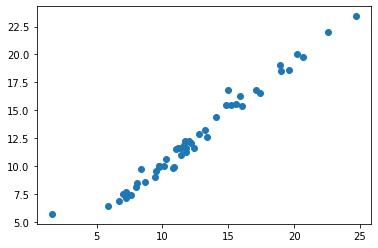

In [121]:
plt.scatter(y_test,y_pred)

In [122]:
print(r2_score(y_test,y_pred)*100)
print(cross_val_score(rfc,x_scaled,y,cv=5).mean())

96.76566142196657
0.9768213451147558


In [ ]:
# By DecisionTree

In [123]:
parameters={"criterion":['mse','mae'],
            "max_features" :['auto','sqrt','log2'],
            }

In [124]:
dt=DecisionTreeRegressor()

In [125]:
grid_search=GridSearchCV(dt,parameters)

In [126]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [127]:
best_param=grid_search.best_params_

In [128]:
best_param

{'criterion': 'mae', 'max_features': 'auto'}

In [129]:
clf=DecisionTreeRegressor(criterion= 'mse', max_features= 'auto')

In [130]:
clf.fit(x_train,y_train)

DecisionTreeRegressor(max_features='auto')

In [131]:
y_pred_dt=clf.predict(x_test)

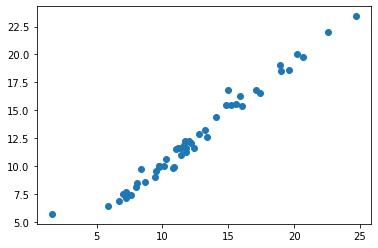

In [132]:
plt.scatter(y_test,y_pred)

In [133]:
print(r2_score(y_test,y_pred_dt)*100)
print(cross_val_score(dt,x_scaled,y,cv=5).mean())

94.143149045832
0.9513798119072007


In [134]:
# tunning with SVR

In [135]:
parameter={'kernel':['linear','poly','sigmoid'],'gamma' : ['scale', 'auto']}

In [136]:
svr=SVR()

In [137]:
grid_search=GridSearchCV(svr,parameter)

In [138]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'sigmoid']})

In [139]:
best_para=grid_search.best_params_

In [140]:
best_para

{'gamma': 'scale', 'kernel': 'linear'}

In [141]:
clf=SVR(gamma='scale',kernel='linear')

In [142]:
clf.fit(x_train,y_train)

SVR(kernel='linear')

In [143]:
y_pred=clf.predict(x_test)

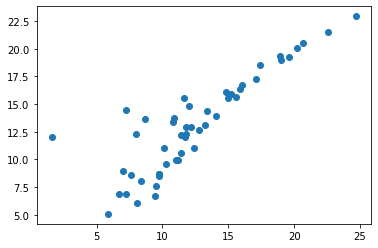

In [144]:
plt.scatter(y_test,y_pred)

In [145]:
print(r2_score(y_test,y_pred)*100)
print(cross_val_score(svr,x_scaled,y,cv=5).mean())

72.86867133095825
0.9105355050541174


In [ ]:
# we get good accuracy and CV score in Random Forest Regressor after hypertunning

In [146]:
# Saving model
import joblib
joblib.dump(best_parameters,'advertising_sales_channel.pkl')

['advertising_sales_channel.pkl']